<a href="https://www.kaggle.com/code/aminaromdhani/resampling-imblanced-data?scriptVersionId=100830142" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Imbalanced datasets
1. >   In this kernel we will know some techniques to handle highly unbalanced datasets, with a focus on resampling

In [2]:
data= pd.read_csv('../input/porto-seguros-safe-driver-prediction/train.csv')

In [3]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
data.drop("id",axis=1,inplace=True)

#  Processing Data

In [5]:
data.shape

(595212, 58)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_

In [7]:
data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isna().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data = data. iloc[0:50000,:]

In [11]:
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2,2,1,0,0,0,0,1,0,...,4,2,2,4,1,0,0,0,1,0
49996,0,0,1,5,0,0,1,0,0,0,...,6,2,1,8,1,0,0,0,0,0
49997,0,0,1,6,1,0,0,1,0,0,...,6,1,1,6,0,1,1,0,0,0
49998,0,4,1,3,1,0,0,0,0,1,...,6,0,3,6,0,1,0,0,1,0


In [12]:
data["ps_ind_01"].value_counts()

0    15830
1    12044
2     6902
5     5129
3     4311
4     2811
6     1514
7     1459
Name: ps_ind_01, dtype: int64

In [13]:
fig, axes = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(22,14*data.shape[1]))
for i in range(len(data.columns)):
    col = data.columns[i]
    sns.countplot(x=col, data=data, palette="pastel", ax=axes[i])
axes[0].legend([])


In [14]:
x=data.drop("target",axis=1)
y=data["target"]

In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: target, Length: 50000, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Count'>

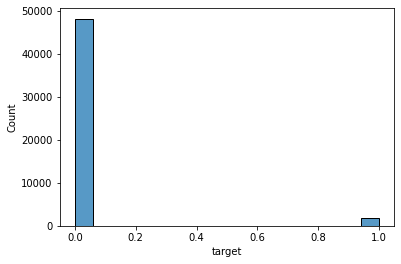

In [16]:
sns.histplot(data=data,x='target')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain ,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [20]:
model = RandomForestClassifier()

model.fit(xtrain, ytrain)

ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [21]:
print("Training")
print(classification_report(ytrain, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43354
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000

Testing 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4813
           1       0.00      0.00      0.00       187

    accuracy                           0.96      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.93      0.96      0.94      5000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision, recall, and f1-score for someone who has a driver who will start a car insurance claim next year is 0

![](https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png)

![](https://miro.medium.com/max/1838/1*P93SeDGPGw0MhwvCcvVcXA.png)

# Undersampling

# 1. RandomUnderSampler

![](https://e476rzxxeua.exactdn.com/wp-content/uploads/2020/03/Undersampling.jpg)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
RUS = RandomUnderSampler(random_state=40)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, stratify=y)

![](https://www.saagie.com/wp-content/uploads/2021/10/stratification-1024x768.png)

In [25]:
xt, yt =RUS.fit_resample(xtrain, ytrain)

In [26]:
model = RandomForestClassifier()

model.fit(xt, yt)

ypred_tr = model.predict(xt)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(yt, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1650
           1       1.00      1.00      1.00      1650

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Testing 
              precision    recall  f1-score   support

           0       0.98      0.59      0.73      4817
           1       0.05      0.61      0.10       183

    accuracy                           0.59      5000
   macro avg       0.51      0.60      0.41      5000
weighted avg       0.94      0.59      0.71      5000



after RandomUnderSampler Precision, recall and degree f1 for someone who has a driver who will start a car insurance claim next year will increase to 0.05, 0.62, 0.10, that's even worse

# 2. AllKNN

In [27]:
from imblearn.under_sampling import AllKNN #This method will apply ENN several time and will vary the number of nearest neighbours

In [28]:
allknn = AllKNN()
X_res, y_res = allknn.fit_resample(xtrain, ytrain)

In [29]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

ypred_tr = model.predict(X_res)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(y_res, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38568
           1       1.00      1.00      1.00      1650

    accuracy                           1.00     40218
   macro avg       1.00      1.00      1.00     40218
weighted avg       1.00      1.00      1.00     40218

Testing 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4817
           1       0.00      0.00      0.00       183

    accuracy                           0.96      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.93      0.96      0.95      5000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ClusterCentroids

Undersample by generating centroids based on clustering methods.

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

![](http://glemaitre.github.io/imbalanced-learn/_images/sphx_glr_plot_cluster_centroids_001.png)

In [30]:
from imblearn.under_sampling import ClusterCentroids 

In [31]:
cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(x, y)

In [32]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

ypred_tr = model.predict(X_res)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(y_res, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1833
           1       1.00      1.00      1.00      1833

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666

Testing 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4817
           1       0.04      1.00      0.07       183

    accuracy                           0.04      5000
   macro avg       0.02      0.50      0.04      5000
weighted avg       0.00      0.04      0.00      5000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Over-sampling methods

# RandomOverSampler

![](https://miro.medium.com/max/375/1*aKJJOozIlVVH1gT-4rYy4w.png)

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(x, y)

In [35]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

ypred_tr = model.predict(X_res)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(y_res, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48167
           1       1.00      1.00      1.00     48167

    accuracy                           1.00     96334
   macro avg       1.00      1.00      1.00     96334
weighted avg       1.00      1.00      1.00     96334

Testing 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4817
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



the model is overfitting

# SMOTE

![](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_007.png)

In [36]:
from imblearn.over_sampling import SMOTE 

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [38]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

ypred_tr = model.predict(X_res)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(y_res, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48167
           1       1.00      1.00      1.00     48167

    accuracy                           1.00     96334
   macro avg       1.00      1.00      1.00     96334
weighted avg       1.00      1.00      1.00     96334

Testing 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4817
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



# ADASYN

![](https://miro.medium.com/max/601/1*dOHFA1ffNyKbQ55Vw0PNzA.png)

In [39]:
from imblearn.over_sampling import ADASYN #This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

In [40]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(x, y)

In [41]:
model = RandomForestClassifier()

model.fit(X_res, y_res)

ypred_tr = model.predict(X_res)
ypred_ts = model.predict(xtest)
print("Training")
print(classification_report(y_res, ypred_tr))
print("Testing ")
print(classification_report(ytest, ypred_ts))

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48167
           1       1.00      1.00      1.00     47646

    accuracy                           1.00     95813
   macro avg       1.00      1.00      1.00     95813
weighted avg       1.00      1.00      1.00     95813

Testing 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4817
           1       1.00      1.00      1.00       183

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

